<a href="https://colab.research.google.com/github/Ruqyai/ds/blob/master/unit3/predictive-modeling-classification/tuning_max_depth_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np ###
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer ###
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz  # Visualization
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# disable warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('weatherAUS.csv')

# We need to remove RISK_MM because we want to predict 'RainTomorrow' and RISK_MM can leak some info to our model
dataset = dataset.drop('RISK_MM', axis=1)

# check if there is any missing value
# sns.set()
# sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap='viridis')
# plt.show()

# remove missing values in numeric columns
#imputer = SimpleImputer(missing_values='NaN', strategy='mean', axis=0)
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True) ###
df_num_col = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am",
              "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm",
              "Temp9am", "Temp3pm"]

data_num = dataset[df_num_col]
imputer = imputer.fit(data_num)
dataset[df_num_col] = imputer.transform(data_num)

# Use encoder for categorical variables
label_encoder = LabelEncoder()
df_cat_col = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "Date", "Location"]

# Update NaN values by NA
data_cat = dataset[df_cat_col].fillna('NA')

# Loop through each categorical variable and update values using LabelEncoder
# - remove missing values in categorical columns
for i in range(len(data_cat.columns)):
    data_cat.iloc[:, i] = label_encoder.fit_transform(data_cat.iloc[:, i])

dataset[df_cat_col] = data_cat

# split dataset in features and target variable
features = dataset.iloc[:, 0:22].values
target = dataset.iloc[:, 22].values


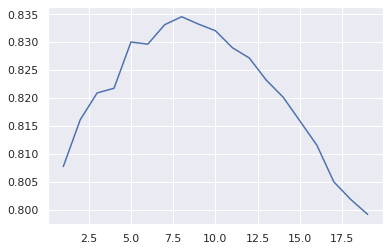

In [3]:
# ----------------------------------------------- Predictive Modeling ----------------------------------------------- #

# Split dataset into training set and test set 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# List of values to try for max_depth:
max_depth_range = list(range(1, 20))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth,
                                 random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

sns.set()
sns.lineplot(max_depth_range, accuracy)
plt.show()